In [38]:
%load_ext autoreload
%autoreload 2
    
from yattag import Doc
from yattag import indent

from IPython.core.display import display, HTML
from IPython.display import IFrame

from jinja2 import Template
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from table_parser import TableParser
import matplotlib.pyplot as plt
import os
import cv2

from bs4 import BeautifulSoup
import json
import random
import numpy as np


from table_generation import RandomTableGenerator
from table_style import CSSGenerator, CSSProperty
from html_generator import HTMLTableGenerator, WordGenerator, HTMLTableGeneratorByTemplate, TableStructure, SpanGenerator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### CSS generator

In [39]:
with open("css/style_template.css") as f:
    css_template_str = f.read()

with open("css/css_properties.json") as f:
    css_default_params = json.load(f)

css_generator = CSSGenerator(css_template_str)

for key, value in css_default_params.items():
    css_generator.add_property(CSSProperty(key, value))

In [40]:
css = css_generator.generate()

In [41]:
print(css.css)

html {
    height:100%;
    width:100%;
    margin:0;
    padding:0;
}

body {
    margin:0;
    padding:0;
    background-color: transparent;
}

@font-face {
    font-family: 'pickedfont';
    src: url(/Users/19592219/git/table_generation/data/fonts/en/BEBAS___.ttf);
}

table {
  font-family: pickedfont;
  border-collapse: collapse;
  font-size: 16,
  width: 75%;
  height: 75%;
}

td {
  /* border:  solid black; */
  text-align: center;
  border-left: solid black 0px;
  border-right: solid black 0px;
  border-top: solid black 0px;
  border-bottom: solid black 0px;
}

tr:nth-child(odd) {
  background-color: none;
}

th {
  background-color: none;
  border: 1px solid none;
}


### Word generator

In [42]:
words = []
# with open("words_alpha.txt") as f:
#     for line in f:
#         words.append(line.strip())
with open("data/russian.txt", encoding='utf-8') as f:
    for line in f:
        words.append(line.strip())
word_generator = WordGenerator(words, n_max=6, p=0.5)

### HTML Template generator

In [43]:
with open("html_templates/fin_table.html") as f:
    html_template_str = f.read()
    
html_generator = HTMLTableGeneratorByTemplate(word_generator, html_template_str)
html_table = html_generator.generate()

In [44]:
html_table.html

<html>
<head>
<link href="style.css" rel="stylesheet"/>
</head>
<body>
<table class="iksweb">
<tbody>
<tr>
<th colspan="6"><word>заражение
</word><word>затопать
</word><word>дэйв
</word><word>ленинград
</word></th>
</tr>
<tr>
<td colspan="4"><word>гомеостаз
</word><word>оттягивать
</word><word>асессор
</word></td>
<td colspan="2"><word>53549.40868890
</word></td>
</tr>
<tr>
<td colspan="4"><word>ролевый
</word><word>безграничный
</word><word>фотографический
</word><word>цап
</word></td>
<td><word>подкосить
</word><word>застать
</word><word>капиталистический
</word><word>винокуров
</word></td>
<td><word>проходимый
</word><word>существительное
</word><word>плутон
</word><word>леонова
</word><word>штурмовой
</word></td>
</tr>
<tr>
<td colspan="4"><word>непредвзято
</word><word>такс
</word><word>фора
</word></td>
<td><word>фемида
</word><word>начитать
</word><word>кп
</word><word>платить
</word><word>самопальный
</word></td>
<td><word>92204.323
</word></td>
</tr>
<tr>
<td colspan="4"><word

### Random Table Generator

In [45]:
random_table_generator = RandomTableGenerator(html_generator, css_generator)
full_table = random_table_generator.generate(name='fin_table')
full_table.save("output/")

### Table parser

In [62]:
chrome_options = Options()
chrome_options.add_argument("disable-extensions")
chrome_options.add_argument("window-position=0,0")
# if random.random()<0.5:
#     w,h = random.randint(500,1000),random.randint(500,1000)
#     chrome_options.add_argument(f"window-size={w},{h}")
#     print(w,h)
# else:
#     print('natural fit')
chrome_options.add_argument("--hide-scrollbars")

chrome_options.add_argument("headless")

table_parser = TableParser(chrome_options)
parsed_table = table_parser.parse_table("output/random_table/1/")

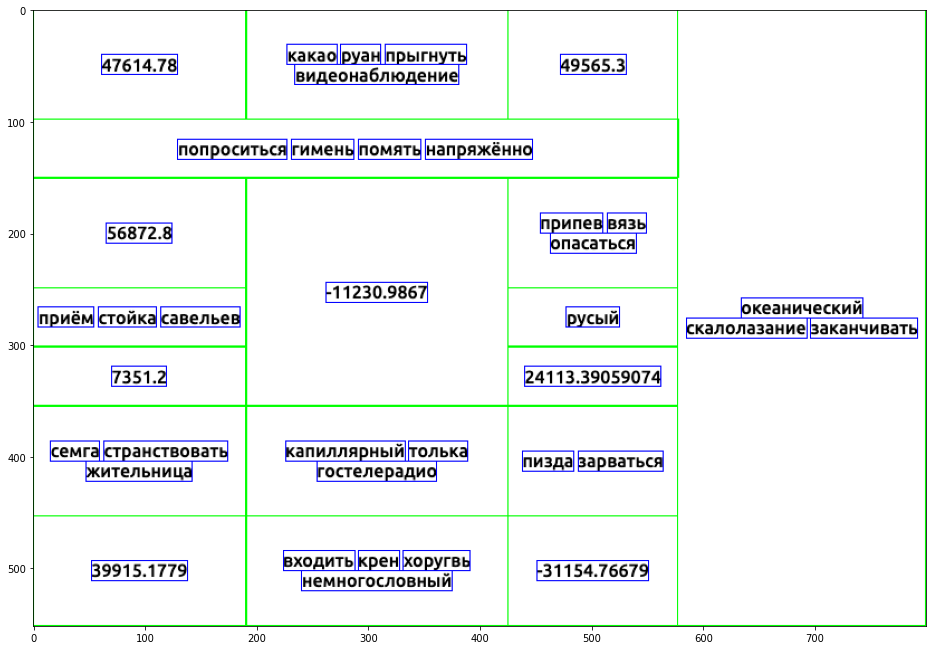

In [63]:
plt.figure(figsize=(16, 16))
plt.imshow(parsed_table.draw_bboxes())

In [48]:
parsed_table.to_annotations()

### HTML table generation

In [49]:
n_rows = 5
n_cols = 5
add_header = False

merge_rows_indx = [-1]
# merge_cols_indx = [2, 4]
merge_cols_indx = [-1]

# table_structure = TableStructure(merge_rows_indx, merge_cols_indx)
# table_structure = TableStructure(merge_rows_indx, None)
table_structure = TableStructure([], merge_cols_indx)
html_generator = HTMLTableGenerator(word_generator, n_rows, n_cols, add_header=add_header, table_structure=table_structure)
html_table = html_generator.generate()
display(HTML(html_table.html))

11764.10308,11520.82555644,-50490.5660442,дарование фа,94022
обстановка подсолнечный артемий,52216.9042,-17881.2543,-15265.3620652,-49339
ночлежка соборность материнка инкогнито,69238.2077793,27269.28,стелиться аналитический антимонопольный,58186.1
хант единовременный заползти левада,92536.65846,-92705.865,96070.14136501,10980
детдомовский либидо предаваться адаптивный,фактура придть обстрел картография чудаковатый,46554.961163,недоедать рейтер газон,


In [50]:
print(html_table.html)

<html>
  <head>
    <link rel="stylesheet" href="style.css" />
  </head>
  <body>
    <table>
      <tr>
        <td>
          <word>11764.10308</word>
        </td>
        <td>
          <word>11520.82555644</word>
        </td>
        <td>
          <word>-50490.5660442</word>
        </td>
        <td>
          <word>дарование</word>
          <word>фа</word>
        </td>
        <td>
          <word>94022</word>
        </td>
      </tr>
      <tr>
        <td>
          <word>обстановка</word>
          <word>подсолнечный</word>
          <word>артемий</word>
        </td>
        <td>
          <word>52216.9042</word>
        </td>
        <td>
          <word>-17881.2543</word>
        </td>
        <td>
          <word>-15265.3620652</word>
        </td>
        <td>
          <word>-49339</word>
        </td>
      </tr>
      <tr>
        <td>
          <word>ночлежка</word>
          <word>соборность</word>
          <word>материнка</word>
          <word>инкогнито</wor

### Spans

In [51]:
span_generator = SpanGenerator(col_indxes={2: 2}, row_indxes={2: 2})

TypeError: __init__() got an unexpected keyword argument 'col_indxes'

In [ ]:
spans_table = span_generator.add_spans(html_table)

In [ ]:
display(HTML(spans_table.html))

In [ ]:
# print(spans_table.html)

### Random Table

In [ ]:
random_table_generator = RandomTableGenerator(html_generator, css_generator)
full_table = random_table_generator.generate(name='random_table')
full_table.save("output/")

In [ ]:
parsed_table = table_parser.parse_table("output/random_table/")

In [ ]:
plt.figure(figsize=(16, 16))
plt.imshow(parsed_table.draw_bboxes())

### Multiple Table generations

In [ ]:
with open("css/style_template.css") as f:
    css_template_str = f.read()
    
with open("css/css_properties.json") as f:
    css_default_params = json.load(f)

css_generator = CSSGenerator(css_template_str)

for key, value in css_default_params.items():
    css_generator.add_property(CSSProperty(key, value))
    
with open("html_templates/fin_table.html") as f:
    html_template_str = f.read()

# html_generator = HTMLTableGenerator(word_generator, i, j, add_header=False)
# html_generator = HTMLTableGeneratorByTemplate(word_generator, html_template_str)

# html_table = html_generator.generate()

In [ ]:
# With no spans
for i in range(4, 8):
    for j in range(4, 8):
        html_generator = HTMLTableGenerator(word_generator, i, j, add_header=False)
        random_table_generator = RandomTableGenerator(html_generator, css_generator)
        for k in range(50, 100):
            full_table = random_table_generator.generate(name="{0}x{1}_{2}".format(i, j, k))
            full_table.save("output/")

In [ ]:
# With spans full width-height spans
N_MIN_ROW = 4
N_MAX_ROW = 8

N_MIN_COL = 4
N_MAX_COL = 8 

TABLE_SIZE_I_J = 50


for i in range(N_MIN_ROW, N_MAX_ROW):
    for j in range(N_MIN_COL, N_MAX_COL):
        # generate spans
        if random.randint(0, 1) == 1:
            # cols
            vector_size = random.randint(0, j - 1)
            merge_cols_indx = np.random.choice(j, vector_size, replace=False).tolist()
            
            table_structure = TableStructure([], merge_cols_indx)
        else:
            # rows
            vector_size = random.randint(0, i - 1)
            merge_rows_indx = np.random.choice(i, vector_size, replace=False).tolist()
            
            table_structure = TableStructure(merge_rows_indx, [])
            
        
        html_generator = HTMLTableGenerator(word_generator, n_rows=i, n_cols=j, add_header=False, table_structure=table_structure)
        random_table_generator = RandomTableGenerator(html_generator, css_generator)
        for k in range(0, TABLE_SIZE_I_J):
            full_table = random_table_generator.generate(name="{0}x{1}_{2}_span_{3}".format(i, j, k, vector_size))
            full_table.save("output_with_spans/")

In [ ]:
# With spans full width-height spans
N_MIN_ROW = 6
N_MAX_ROW = 10

N_MIN_COL = 6
N_MAX_COL = 10

TABLE_SIZE_I_J = 40


for i in range(N_MIN_ROW, N_MAX_ROW):
    for j in range(N_MIN_COL, N_MAX_COL):
        table_structure = TableStructure([], [])
        

        table_structure = TableStructure([], [])
        html_generator = HTMLTableGenerator(word_generator, n_rows=i, n_cols=j, add_header=False, table_structure=table_structure)
        random_table_generator = RandomTableGenerator(html_generator, css_generator)
        for k in range(0, TABLE_SIZE_I_J):
            
            col_merge_indx = random.randint(0, j - 2)
            col_span_size = random.randint(0, j - col_merge_indx - 2) + 2
            col_span_indx = {col_merge_indx: col_span_size}


            row_merge_indx = random.randint(0, i - 2)
            row_span_size = random.randint(0, i - row_merge_indx - 2) + 2
            row_span_indx = {row_merge_indx: row_span_size}
            
            span_generator = SpanGenerator(col_indxes=col_span_indx, row_indxes=row_span_indx)
            
            if col_merge_indx == 0 and row_merge_indx == 0:
                print("col_merge_indx == row_merge_indx == 0")
                continue
                
                
            full_table = random_table_generator.generate(name="{0}x{1}_{2}_row_{3}_col_{4}".format(i, j, k, row_merge_indx, col_merge_indx))
            try:
                full_table.html = span_generator.add_spans(full_table.html)
            except:
                print(f"I: {i}, J: {j}, col_span_indx: {col_span_indx}, row_span_indx: {row_span_indx}")
                continue
            full_table.save("output_with_header_spans/")

In [ ]:
full_table.html

In [ ]:
ROOT_DATA = "output_with_header_spans/"
chrome_options = Options()
chrome_options.add_argument("disable-extensions")
chrome_options.add_argument("window-position=0,0")
chrome_options.add_argument("--hide-scrollbars")

chrome_options.add_argument("headless")

table_parser = TableParser(chrome_options)

parsed_tables = []
for table_path in [file_name for file_name in os.listdir(ROOT_DATA)]:
    if table_path.startswith("."):
        continue
    if "table.png" in os.listdir(ROOT_DATA + table_path):
        continue
    print(table_path)
    parsed_table = table_parser.parse_table(ROOT_DATA + table_path)
    parsed_tables.append(parsed_table)

In [ ]:
for parsed_table in parsed_tables:
    parsed_table.to_annotations()

In [ ]:
for parsed_table in parsed_tables[:10]:
    plt.figure(figsize=(16, 16))
    plt.imshow(parsed_table.draw_bboxes())
    plt.show()